# CEWA 565 - Homework 1

### Daniel Hogan

### 10/12/2021


#### **Part A.**
*Plot the data from the Sauk River and Skykomish River as a time series from 1929-2020. Use different color lines or symbols to distinguish the two rivers. Be sure to label your axes appropriately and use plt.legend() to create a legend. Describe qualitatively any changes you see in these records through time. Is there a common theme between the two sites?*

In [2]:
# import packages to be used
import numpy as np
import pandas as pd
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline

In [3]:
# change working directory
path = '/home/jovyan/Week-1/HW-1/'
os.chdir(path)
# save each river peak flow file 
sauk_peaks = pd.read_excel('Sauk_peak_WY1929_2017.xlsx',skiprows=6).iloc[1:]
## useful for later reference pd.read_excel("file_name", comment='#').index_col
skykomish_peaks = pd.read_excel('Skykomish_peak_flow_12134500_skykomish_river_near_gold_bar.xlsx')

/opt/conda/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
# get column names for each
print('Sauk peaks columns are: {}'.format(', '.join([*sauk_peaks.columns])))
print('Skykomish peaks columns are: {}'.format(', '.join([*skykomish_peaks.columns])))
# find final WY to ensure it is 2020
print('Final water year is ' + str(skykomish_peaks.iloc[-1]['water year']))

Sauk peaks columns are: water_year, peak_dt, peak_va, gage_ht
Skykomish peaks columns are: date of peak, water year, peak value (cfs), gage_ht (feet)
Final water year is 2020


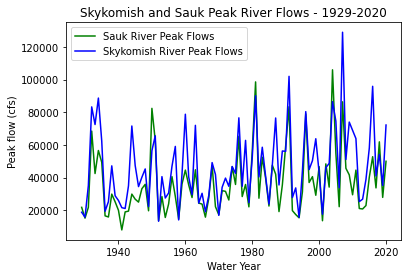

In [5]:
# create plot of Sauk and Skykomish river peak flows from 1929-2020
plt.plot(sauk_peaks['water_year'],sauk_peaks['peak_va'],'-', color = 'green', label='Sauk River Peak Flows')
plt.plot(skykomish_peaks['water year'],skykomish_peaks['peak value (cfs)'],'-', color = 'blue', label='Skykomish River Peak Flows')
plt.title('Skykomish and Sauk Peak River Flows - 1929-2020')
plt.xlabel('Water Year')
plt.ylabel('Peak flow (cfs)')
plt.legend()

**Explanation:** 

The plot of these data are relatively similar: low and high relative peak flows for one river generally match the other. From this data, it appears the maximum peak flows have generally been increasing from 1929 to 2020; however, the variance from year to year between peak flows appears to also be increasing (e.g. a high relative peak flow one year can coincide with a low relative peak flow the following year)

#### **Part B.**

We know that in water year 1977, there was a large PDO shift in the North Pacific, and we want to know if floods were statistically different before and after this date. In this homework, we will graphically examine the data.

**For the Sauk River only**, create and examine the following plots for three time periods: the entire timeseries, all data before 1977, all data from 1977 and later.

(Make sure that the following plots are well-labeled, readable, and convey meaningful information)

1. Histograms for the Sauk River for the entire period and the two sub-periods (3 histograms total)
2. Quantile plots using the Cunnane plotting position (see section 2.1.3 in Helsel et al., 2020) for the Sauk River for the entire period and the two sub-periods. Plot all three lines on the same figure, with different line types/colors and a legend.
3. Probability Density Functions (PDFs) for the Sauk River for the entire period and the two sub-periods. The 3 plots should be plotted on one graph, with different line types and a legend.
4. Estimate the sample mean and standard deviation for each of the two sub-periods (before and after 1977). Assuming a Gaussian (normal) distribution, add theoretical quantile curves to the quantile plots you made earlier. (Theoretical meaning that you're plotting Gaussian Cumulative Density Functions (CDFs) that have the same mean and standard deviation that you calculate). (The plot should now have 6 lines on it – please choose colors and line types to help distinguis them, and label carefully.)
5. Box and whisker plots for each of for the entire period and the two sub-periods, with appropriate labels.

In [6]:
# genarate pre and post 1977 Sauk River datasets
sauk_peaks_pre_1977 = sauk_peaks[sauk_peaks['water_year']<1977]
sauk_peaks_post_1977 = sauk_peaks[sauk_peaks['water_year']>=1977]

<ipython-input-7-0ca52e21fc11>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1


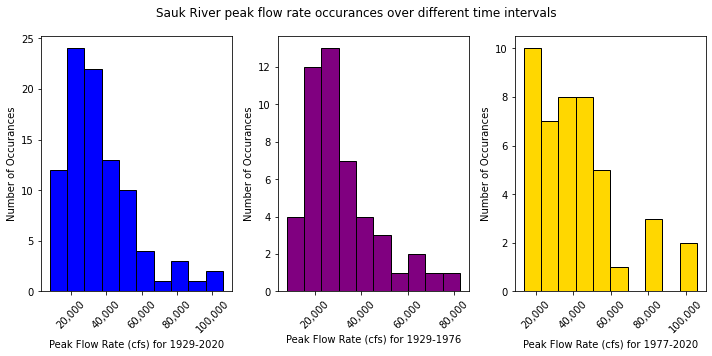

In [7]:
# store each dataframe in dictionary for later reference
sauk_river_peaks = {'1929-2020':sauk_peaks, 
                    '1929-1976':sauk_peaks_pre_1977,
                    '1977-2020':sauk_peaks_post_1977}
# B.1. Plot histograms
# set up subplots
fig, axs = plt.subplots(1,3, figsize=(10,5), tight_layout=True)
fig.suptitle('Sauk River peak flow rate occurances over different time intervals')
colour = ['b','purple','gold']
# specify number of bins for histogram
nbins = 10
# for loop used to plot histograms for each time series of Sauk River peak data
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    axs[i].hist(df['peak_va'], nbins, fc=colour[i], ec='black')
    axs[i].set_xlabel('Peak Flow Rate (cfs) for {}'.format(dates))
    axs[i].set_ylabel('Number of Occurances')
    axs[i].set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1
    axs[i].get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 2

In [8]:
# This function requires that the input is a pandas dataframe, with column names, and an integer index
# It returns a copy of the dataframe with an extra column added that has the Cunnane plotting positions
# Reference 3
def cunnane_quantile(df, column_name):
    '''This function will compute the Cunnane plotting position for the values in a column of a dataframe.
    It requres a pandas dataframe, and the column name of interest (a text string) as inputs.
    The output is a new dataframe, ranked (sorted) with an extra column with the plotting position.
    [Steven Pestana, spestana@uw.edu, Oct. 2020]'''
    
    # Rank all our values
    ranked_df = df.sort_values(by=[column_name]).reset_index()
    
    # Calculate the Cunnane plotting position
    ranked_df['cunnane_plotting_position'] = ((ranked_df.index + 1) - (2/5)) / (ranked_df[column_name].count() + (1/5))
        
    return ranked_df

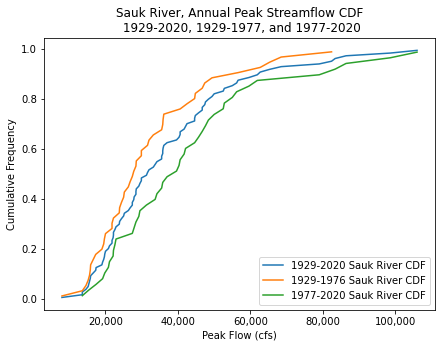

In [9]:
# B.2. Plot CDFs
fig, ax = plt.subplots(1, 1, figsize=(7, 5))
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    sauk_quant = cunnane_quantile(df,'peak_va')
    ax.plot(sauk_quant['peak_va'],sauk_quant['cunnane_plotting_position'], label='{} Sauk River CDF'.format(dates))
ax.set_xlabel('Peak Flow (cfs)')
ax.set_ylabel('Cumulative Frequency')
ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 2
ax.set_title('Sauk River, Annual Peak Streamflow CDF\n 1929-2020, 1929-1977, and 1977-2020')
ax.legend()

<ipython-input-11-56b5aab8cce4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1
<ipython-input-11-56b5aab8cce4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1
<ipython-input-11-56b5aab8cce4>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1


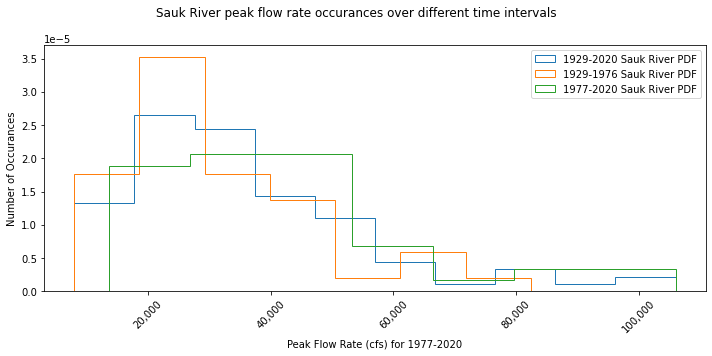

In [11]:
# B.3. Plot PDFs
# store each dataframe in dictionary for later reference
sauk_river_peaks = {'1929-2020':sauk_peaks, 
                    '1929-1976':sauk_peaks_pre_1977,
                    '1977-2020':sauk_peaks_post_1977}
# set up subplots
fig, ax = plt.subplots(1,1, figsize=(10,5), tight_layout=True)
fig.suptitle('Sauk River peak flow rate occurances over different time intervals')
colour = ['red','blue','green']
# for loop used to plot histograms for each time series of Sauk River peak data
for i,(dates,df) in enumerate(sauk_river_peaks.items()):
    ax.hist(df['peak_va'], bins='sqrt', fc=colour[i], density=True, histtype='step', label='{} Sauk River PDF'.format(dates))
    ax.set_xlabel('Peak Flow Rate (cfs) for {}'.format(dates))
    ax.set_ylabel('Number of Occurances')
    ax.set_xticklabels(axs[i].get_xticks(), rotation = 45) # reference 1
    ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ','))) # reference 2
ax.legend()

## References:
This assignment used the following links for code snippets that was applied to the questions asked:
1. 
2. https://stackoverflow.com/questions/51734218/formatting-y-axis-matplotlib-with-thousands-separator-and-font-size
3. Lab 2-1